Credit to [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

# Chapter 8 practice

In [2]:
import os, shutil, pathlib
new_base_dir = pathlib.Path("cats_vs_dogs_small")

**Instantiating a small convnet for dogs vs. cats classification**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

**Configuring the model for training**

In [5]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [10]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [11]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [12]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [13]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [14]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


63/63 [==============================] - 75s 1s/step - loss: 0.7080 - accuracy: 0.5040 - val_loss: 0.6907 - val_accuracy: 0.5130
Epoch 2/30
63/63 [==============================] - 78s 1s/step - loss: 0.6940 - accuracy: 0.5290 - val_loss: 0.6914 - val_accuracy: 0.5100
Epoch 3/30
63/63 [==============================] - 64s 999ms/step - loss: 0.6816 - accuracy: 0.5550 - val_loss: 0.6658 - val_accuracy: 0.6170
Epoch 4/30
63/63 [==============================] - 59s 944ms/step - loss: 0.6354 - accuracy: 0.6390 - val_loss: 0.6513 - val_accuracy: 0.5900
Epoch 5/30
63/63 [==============================] - 62s 987ms/step - loss: 0.6209 - accuracy: 0.6590 - val_loss: 0.5974 - val_accuracy: 0.6600
Epoch 6/30
63/63 [==============================] - 56s 888ms/step - loss: 0.5672 - accuracy: 0.7125 - val_loss: 0.5686 - val_accuracy: 0.6870
Epoch 7/30
63/63 [==============================] - 58s 915ms/step - loss: 0.5810 - accuracy: 0.6885 - val_loss: 0.6787 - val_accuracy: 0.6270
Epo

**Displaying curves of loss and accuracy during training**

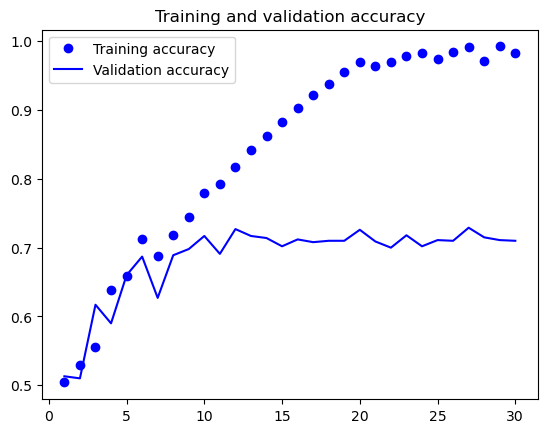

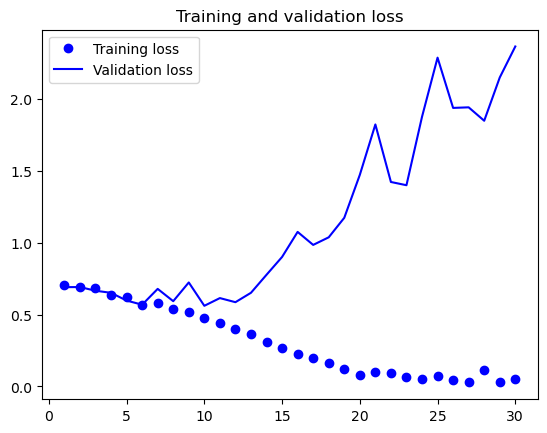

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [17]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 5s 69ms/step - loss: 0.5710 - accuracy: 0.7215
Test accuracy: 0.721


Using data augmentation

**Define a data augmentation stage to add to an image model**

In [18]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
# Can think of it as introducing noise to reveal the most robust features in the data

**Displaying some randomly augmented training images**

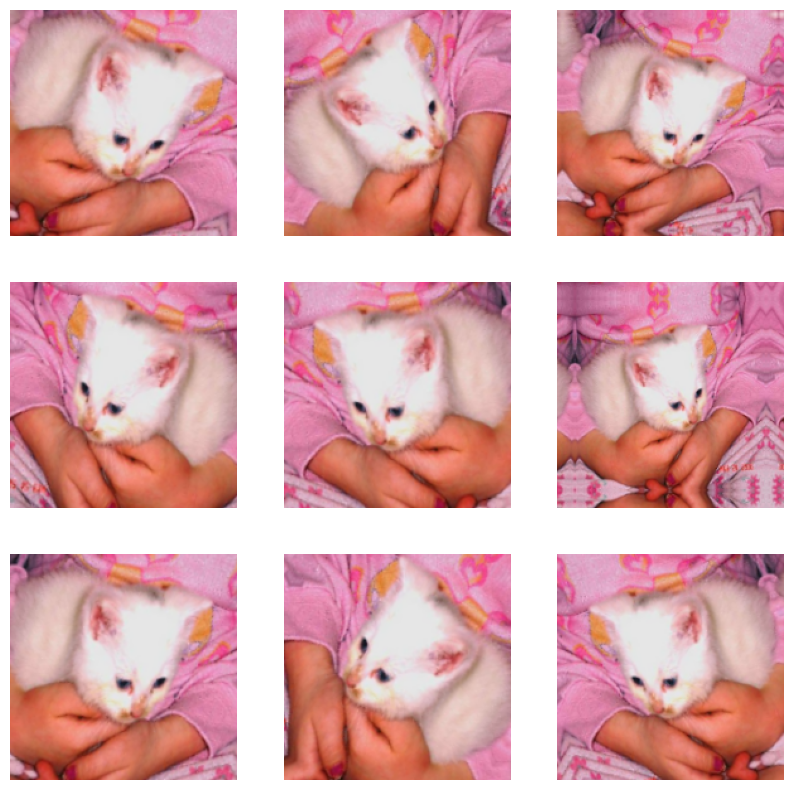

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [20]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100


63/63 [==============================] - 17s 261ms/step - loss: 0.6943 - accuracy: 0.5215 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 37s 590ms/step - loss: 0.6948 - accuracy: 0.5085 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 49s 778ms/step - loss: 0.6958 - accuracy: 0.5200 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 47s 739ms/step - loss: 0.7043 - accuracy: 0.5310 - val_loss: 0.6873 - val_accuracy: 0.5290
Epoch 5/100
63/63 [==============================] - 45s 708ms/step - loss: 0.6671 - accuracy: 0.5920 - val_loss: 0.7580 - val_accuracy: 0.5380
Epoch 6/100
63/63 [==============================] - 45s 719ms/step - loss: 0.6644 - accuracy: 0.6290 - val_loss: 0.6242 - val_accuracy: 0.6310
Epoch 7/100
63/63 [==============================] - 45s 718ms/step - loss: 0.6230 - accuracy: 0.6525 - val_loss: 1.4759 - val_accuracy: 0.5080
Epoc

**Evaluating the model on the test set**

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 5s 83ms/step - loss: 0.4552 - accuracy: 0.8320
Test accuracy: 0.832


 Leveraging a pretrained model

Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [23]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 10s 0us/step


In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [25]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 488ms/step


In [26]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [27]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 29.4840 - accuracy: 0.9155 - val_loss: 4.3862 - val_accuracy: 0.9690
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 3.6442 - accuracy: 0.9725 - val_loss: 11.5257 - val_accuracy: 0.9430
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.8884 - accuracy: 0.9855 - val_loss: 4.8265 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5587 - accuracy: 0.9920 - val_loss: 4.3374 - val_accuracy: 0.9710
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.7035 - accuracy: 0.9960 - val_loss: 4.3815 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3860 - accuracy: 0.9960 - val_loss: 7.0371 - val_accuracy: 0.9690
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.3348 - accuracy: 0.9960 - val_loss: 10.1295 - val_accuracy: 0.9680
Epoch 8/20
63/63

**Plotting the results**

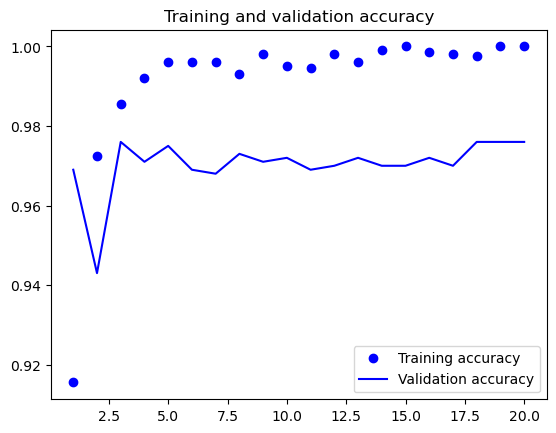

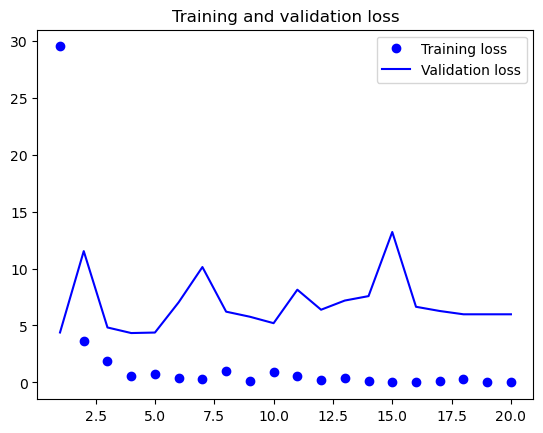

In [28]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()